# CellChat

In [1]:
# install.packages("Seurat")

# # install.packages("devtools")
# BiocManager::install("BiocNeighbors")
# # devtools::install_github("hadley/devtools")

# install.packages('NMF')
# devtools::install_github("jokergoo/circlize")
# devtools::install_github("jokergoo/ComplexHeatmap")

# devtools::install_github("sqjin/CellChat")

In [2]:
# # in py console
# pip install umap-learn

In [3]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(magrittr)
library(CellChat)              
library(patchwork)
library(igraph)

Warning message:
“пакет ‘Seurat’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: SeuratObject

Warning message:
“пакет ‘SeuratObject’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: sp

Warning message:
“пакет ‘sp’ был собран под R версии 4.3.3”
Registered S3 method overwritten by 'future':
  method               from      
  all.equal.connection parallelly


Присоединяю пакет: ‘SeuratObject’


Следующие объекты скрыты от ‘package:base’:

    intersect, t


Warning message:
“пакет ‘ggplot2’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘dplyr’


Следующие объекты скрыты от ‘package:stats’:

    filter, lag


Следующие объекты скрыты от ‘package:base’:

    intersect, setdiff, setequal, union


Загрузка требуемого пакета: igraph

Warning message:
“пакет ‘igraph’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘igraph’


Следующие объекты скрыты от ‘package:dplyr’:

    as_data_frame, groups, union


Следующий объект скрыт от ‘package:Seurat’:

    component

In [4]:
# Multicore CPU usage activation - Future

library(future)

# plan("multicore", workers = 24) # Mac Pro 6.1
# plan(workers = 36) # iMac Pro 1.1
# plan("multicore", workers = 8) # 4 core Intel CPU and M1 have 8 threads
# plan("multicore", workers = 12) # 6 core Intel CPU has 12 threads
plan("multicore", workers = 10) # 10 core M1 Pro CPU has 10 threads

# Set RAM Size to 3/4 of total RAM

# options(future.globals.maxSize = 48000 * 1024^2) # Mac Pros have 64 Gb
options(future.globals.maxSize = 12000 * 1024^2) # iMacs and MacBook Pros have 16 Gb

future.seed = NULL # Removes future-generated statistical errors

Warning message:
“пакет ‘future’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘future’


Следующие объекты скрыты от ‘package:igraph’:

    %->%, %<-%




In [5]:
# Seurat

Multimodal_seurat_object <- readRDS('Seurat_Clusters.rds')

In [6]:
Multimodal_seurat_object@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,Group,Sample,Batch,nCount_SCT,nFeature_SCT,SCT.weight,ADT.weight,wsnn_res.0.36,seurat_clusters,cluster_merged
,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Non-TD T-cells_Sample 1_26559,Non-TD T-cells_Sample 1,1704,124,1620,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,782,100,7.580087e-03,0.99241991,2,2,2
Non-TD T-cells_Sample 1_62766,Non-TD T-cells_Sample 1,2571,147,2376,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,800,113,2.227180e-03,0.99777282,2,2,2
Non-TD T-cells_Sample 1_70254,Non-TD T-cells_Sample 1,639,107,2383,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,753,107,1.106141e-06,0.99999889,0,0,0
Non-TD T-cells_Sample 1_135684,Non-TD T-cells_Sample 1,527,83,1531,14,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,756,83,1.434172e-27,1.00000000,0,0,0
Non-TD T-cells_Sample 1_144969,Non-TD T-cells_Sample 1,1071,103,2972,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,786,103,8.023335e-16,1.00000000,0,0,0
Non-TD T-cells_Sample 1_167076,Non-TD T-cells_Sample 1,703,103,2289,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,760,103,2.727234e-01,0.72727663,0,0,0
Non-TD T-cells_Sample 1_175702,Non-TD T-cells_Sample 1,1209,128,620,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,799,127,9.851140e-01,0.01488604,7,7,7
Non-TD T-cells_Sample 1_228916,Non-TD T-cells_Sample 1,608,94,3037,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,758,94,5.709889e-01,0.42901105,0,0,0
Non-TD T-cells_Sample 1_241934,Non-TD T-cells_Sample 1,575,71,967,15,Non-TD T-cells,Sample 1,Non-TD T-cells_Sample 1,674,72,2.106646e-03,0.99789335,2,2,2


In [7]:
# Subset on a value in the object meta data
CellChat_T <- subset(x = Multimodal_seurat_object, 
                      subset = Group == "anti-Her2:neu T-cells + Tumor")

In [8]:
CellChat_T <- createCellChat(CellChat_T,
#                               group.by = 'Sample',
                              assay = 'SCT',
                              do.sparse = T)

CellChatDB <- CellChatDB.human

CellChatDB.use <- CellChatDB
CellChat_T@DB <- CellChatDB.use
CellChat_T <- subsetData(CellChat_T)
CellChat_T <- identifyOverExpressedGenes(CellChat_T)
CellChat_T <- identifyOverExpressedInteractions(CellChat_T)

CellChat_T <- projectData(CellChat_T, PPI.human)

CellChat_T <- computeCommunProb(CellChat_T)

CellChat_T <- computeCommunProbPathway(CellChat_T)

CellChat_T <- aggregateNet(CellChat_T)

library(NMF)
library(ggalluvial)

[1] "Create a CellChat object from a Seurat object"


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the CellChat package.
  Please report the issue to the authors.”


The `meta.data` slot in the Seurat object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  CD8 Naïve CD8 CM CD8 TEM CD8 Teff CD4 Naïve CD4 CM CD4 FH CD4 Th17 CD4 Treg γδ NKT 
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-10-18 14:51:58.715731]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-10-18 14:52:27.000264]"


Warning message:
“пакет ‘NMF’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: registry

Загрузка требуемого пакета: rngtools

Загрузка требуемого пакета: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')


Присоединяю пакет: ‘NMF’


Следующий объект скрыт от ‘package:future’:

    run


Следующие объекты скрыты от ‘package:igraph’:

    algorithm, compare




In [9]:
# selectK(CellChat_T, pattern = "outgoing")

In [10]:
# selectK(CellChat_T, pattern = "incoming")

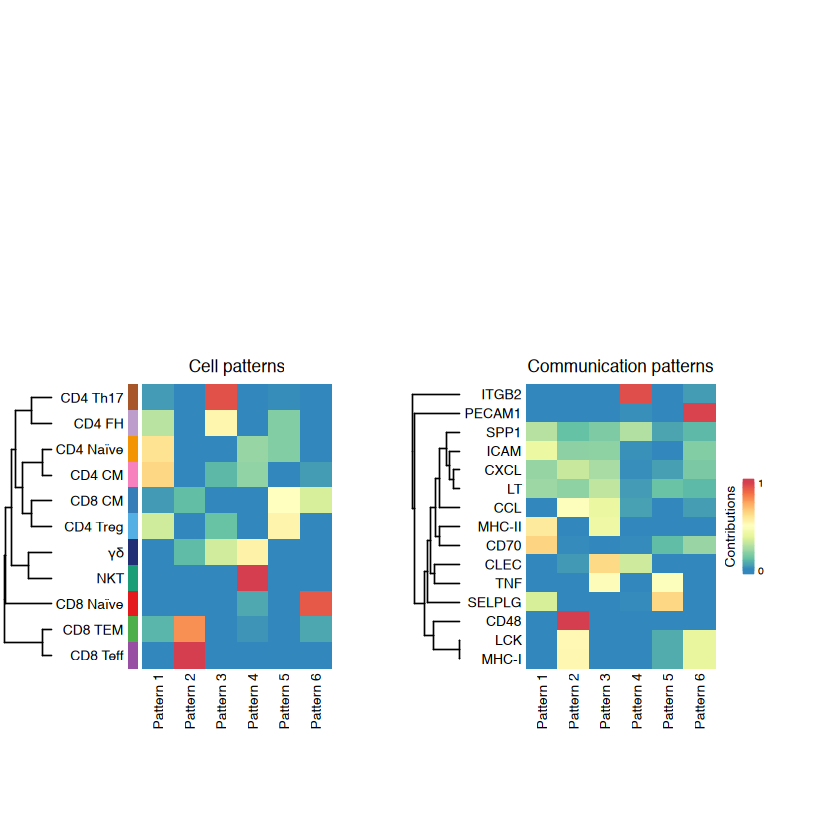

In [11]:
nPatterns = 4
CellChat_T <- identifyCommunicationPatterns(CellChat_T, 
                                          pattern = "outgoing", 
                                          k = nPatterns)
nPatterns = 6
CellChat_T <- identifyCommunicationPatterns(CellChat_T, 
                                          pattern = "incoming", 
                                          k = nPatterns)

In [12]:
CellChat_T@netP$pathways

[1] "MHC-I"  "MHC-II" "ICAM"   "LCK"    "CCL"    "ITGB2"  "SELPLG" "CXCL"  
 [9] "CD70"   "CLEC"   "LT"     "CD48"   "TNF"    "SPP1"   "PECAM1"

Do heatmap based on a single object 




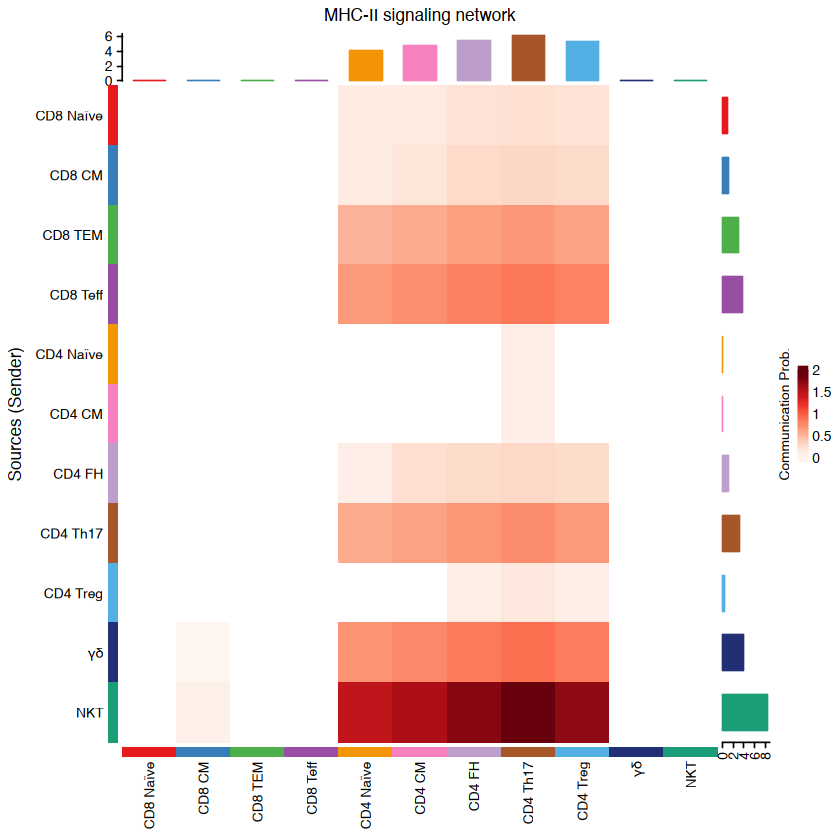

In [13]:
pathways.show <- c("MHC-II") 

# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(CellChat_T, signaling = pathways.show, color.heatmap = "Reds")
#> Do heatmap based on a single object

[[1]]


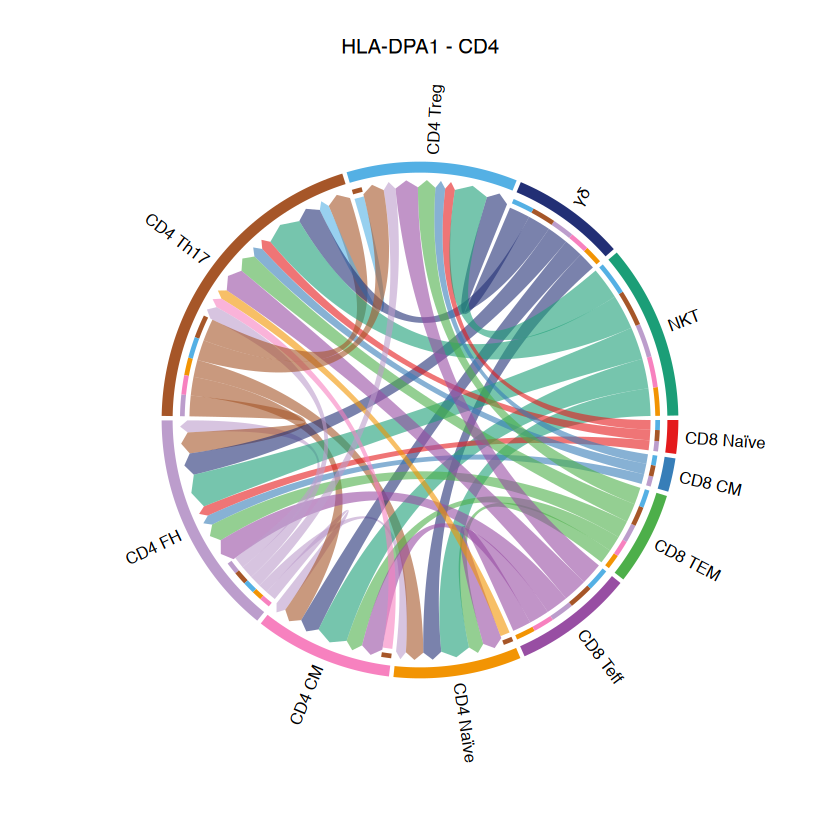

In [14]:
# Chord diagram
pairLR <- extractEnrichedLR(CellChat_T, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR[1,] # show one ligand-receptor pair
netVisual_individual(CellChat_T, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")

Comparing communications on a single object 




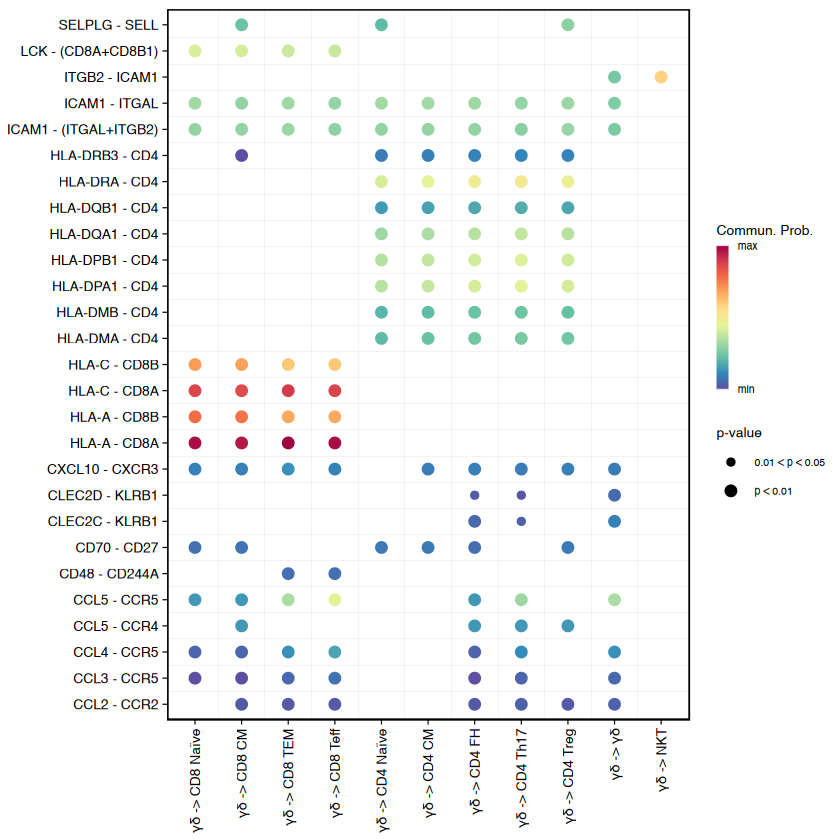

In [15]:
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_bubble(CellChat_T, sources.use = 10, remove.isolate = FALSE)
#> Comparing communications on a single object

ggsave( 
  "Dot Plot Outgoing MHC-II gd.png",
  plot   = last_plot(),
  width  = 15, 
  height = 18 ,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)

Comparing communications on a single object 




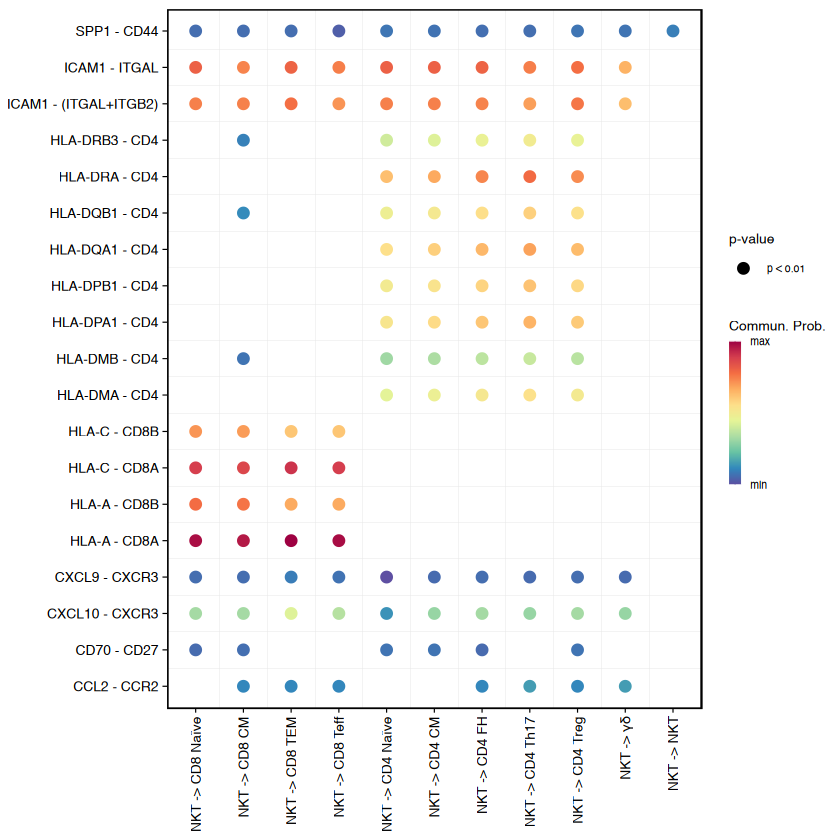

In [16]:
# show all the significant interactions (L-R pairs) from some cell groups (defined by 'sources.use') to other cell groups (defined by 'targets.use')
netVisual_bubble(CellChat_T, sources.use = 11, remove.isolate = FALSE)
#> Comparing communications on a single object

ggsave( 
  "Dot Plot Outgoing MHC-II NKT.png",
  plot   = last_plot(),
  width  = 15, 
  height = 18,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)

Please make sure you have load `library(ggalluvial)` when running this function



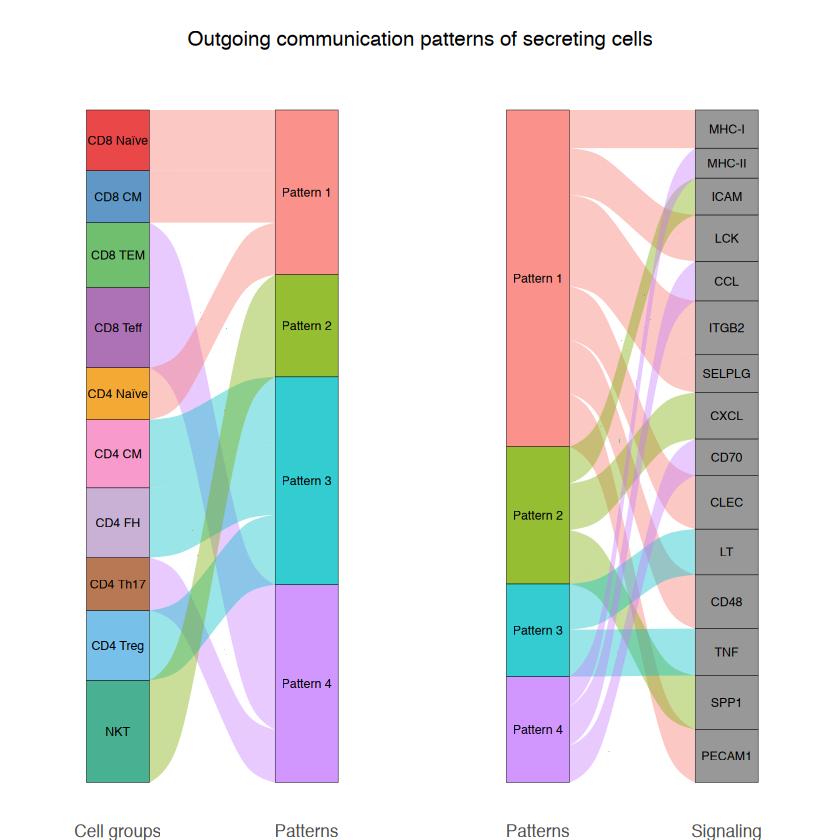

In [17]:
# river plot
netAnalysis_river(CellChat_T, pattern = "outgoing")
#> Please make sure you have load `library(ggalluvial)` when running this function

ggsave( 
  "River Plot Outgoing Comm anti-Her2:neu T-cells + Tumor.png",
  plot   = last_plot(),
  width  = 20, 
  height = 11,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)

Please make sure you have load `library(ggalluvial)` when running this function



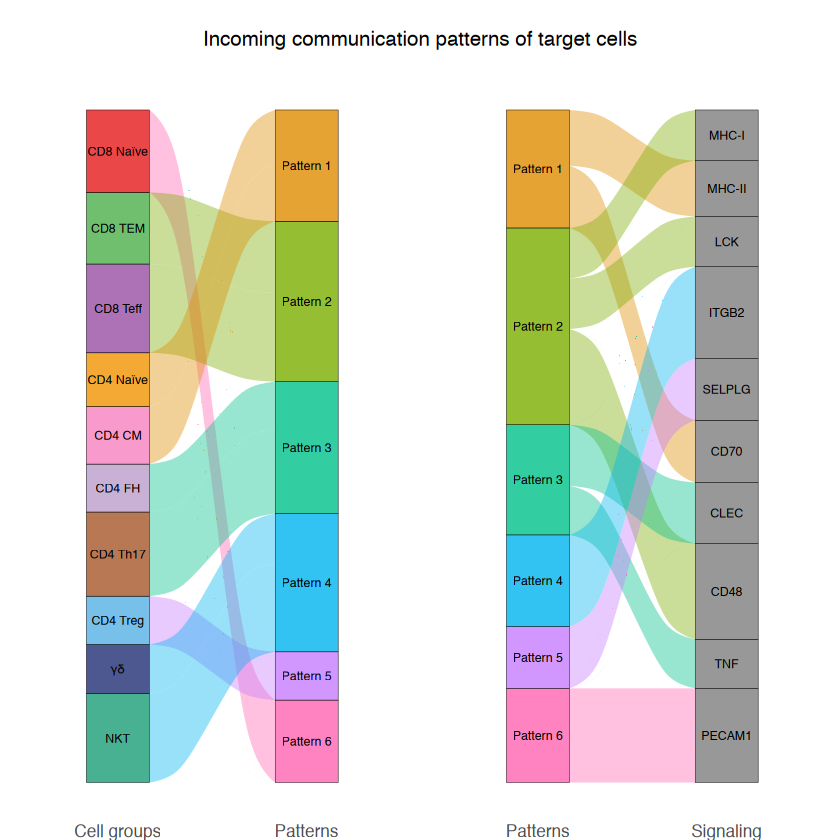

In [18]:
# river plot
netAnalysis_river(CellChat_T, pattern = "incoming")
#> Please make sure you have load `library(ggalluvial)` when running this function

ggsave( 
  "River Plot Incoming Comm anti-Her2:neu T-cells + Tumor.png",
  plot   = last_plot(),
  width  = 20, 
  height = 11,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)

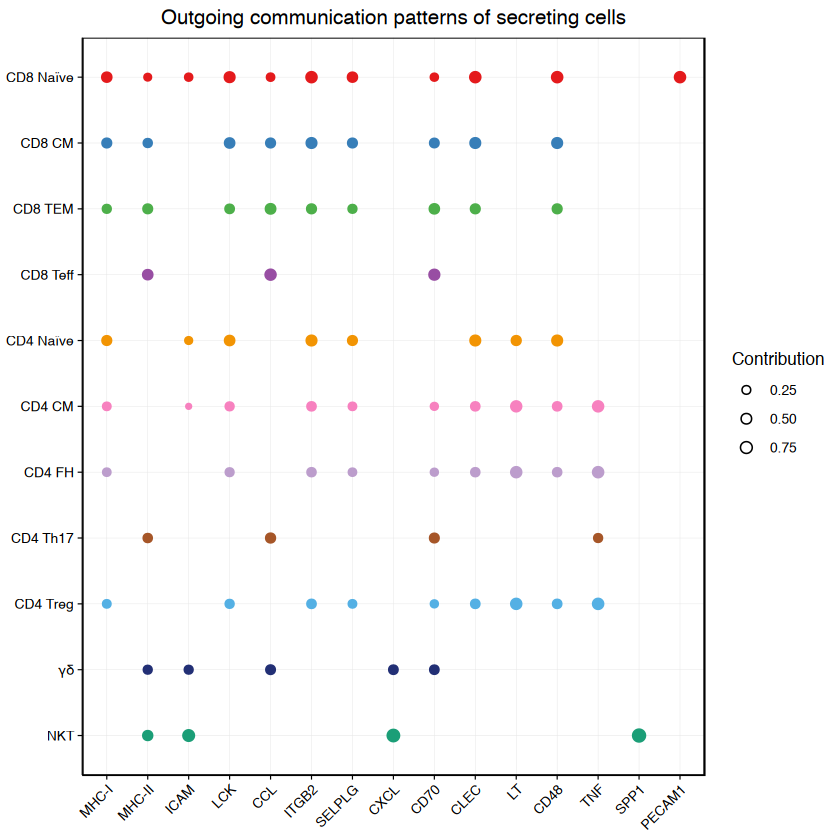

In [19]:
# dot plot
netAnalysis_dot(CellChat_T, pattern = "outgoing")

ggsave( 
  "Dot Outgoing Comm anti-Her2:neu T-cells + Tumor.png",
  plot   = last_plot(),
  width  = 20, 
  height = 9,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)

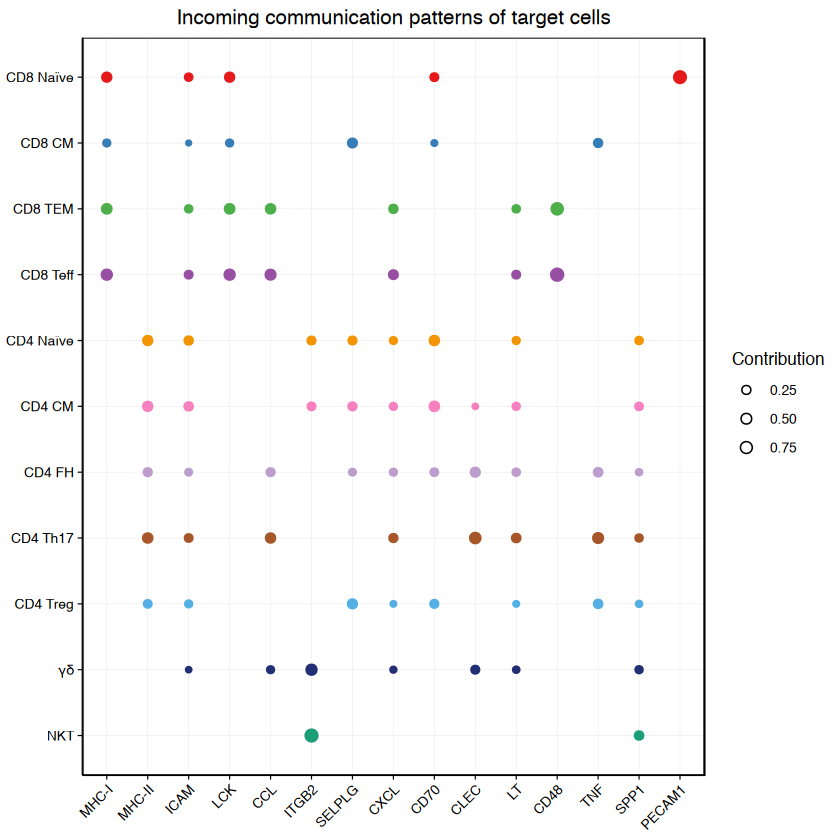

In [20]:
# dot plot
netAnalysis_dot(CellChat_T, pattern = "incoming")

ggsave( 
  "Dot Incoming Comm anti-Her2:neu T-cells + Tumor.png",
  plot   = last_plot(),
  width  = 20, 
  height = 9,
  units  = "cm",
  dpi    = 600,
  limitsize = TRUE,
  bg     = "white"
)